In [2]:
#@title IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from xgboost import XGBClassifier


In [3]:
#@title Task01

dataset = pd.read_csv('/content/heart.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
Information: 
 None


Statistica Summary: 
              age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    

<Figure size 1000x800 with 0 Axes>

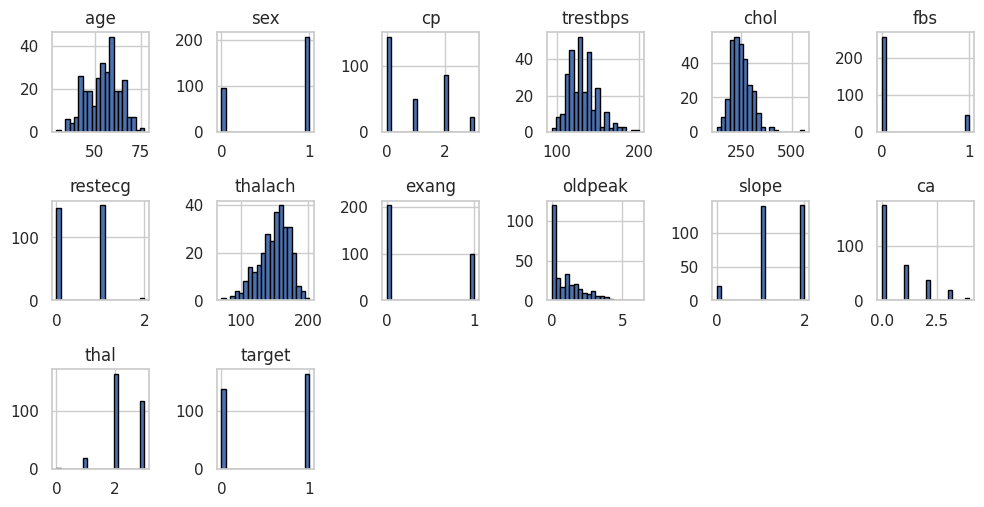


Target Class Distribution:
target
1    164
0    138
Name: count, dtype: int64


In [4]:
dataset.drop_duplicates(inplace=True) #DROP DUPLICATES

#A (Basic Infromation And Statistical Summary)
print("Information: \n",dataset.info())
print("\n\nStatistica Summary: \n",dataset.describe())

# Feature distributions
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
dataset.hist(bins=20, figsize=(10, 10), layout=(6, 6), edgecolor="black")
plt.tight_layout()
plt.show()

# Target Class Distribution
print("\nTarget Class Distribution:")
print(dataset['target'].value_counts())

In [5]:
#B

uniqueCategories = dataset['target'].value_counts()
print("Unique Categories:\n", uniqueCategories)

if uniqueCategories.max() / uniqueCategories.min() > 1.5:
    print("The Dataset Is ImBalanced.")
else:
    print("The Dataset Is Balanced.")

Unique Categories:
 target
1    164
0    138
Name: count, dtype: int64
The Dataset Is Balanced.


In [6]:
#C

if dataset.isnull().values.any():
    missingValues = dataset.isnull().sum()
    print("Missing Values:\n", missingValues)

    cleanedDataset = dataset.fillna(dataset.mean())
    print("Dataset After Removing Missing Values: ", cleanedDataset)
else:
    print("No missing values in the dataset.")


if dataset.duplicated().any():
    duplicateRecords = dataset.duplicated().sum()
    print("\nDuplicate Records:\n", duplicateRecords)

    cleanedDataset = dataset.drop_duplicates()
    print("Dataset After Removing Duplicates: ", cleanedDataset)
else:
    print("No duplicate records in the dataset.")

categoricalFeatures = dataset.select_dtypes(include=['object']).columns
print("\nCategorical Features:\n", categoricalFeatures)
#Here No Categirical Feature Exists!!
print(dataset)

No missing values in the dataset.
No duplicate records in the dataset.

Categorical Features:
 Index([], dtype='object')
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0     

In [7]:
#D

scaler = StandardScaler()
scaledDataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

print("\nScaled DataFrame:")
print(scaledDataset.describe())

dataset


Scaled DataFrame:
                age           sex            cp      trestbps          chol  \
count  3.020000e+02  3.020000e+02  3.020000e+02  3.020000e+02  3.020000e+02   
mean  -2.676299e-16 -5.881976e-17 -1.058756e-16 -6.676043e-16 -1.470494e-17   
std    1.001660e+00  1.001660e+00  1.001660e+00  1.001660e+00  1.001660e+00   
min   -2.814192e+00 -1.464866e+00 -9.352080e-01 -2.144521e+00 -2.332210e+00   
25%   -7.107878e-01 -1.464866e+00 -9.352080e-01 -6.617119e-01 -6.870826e-01   
50%    1.195033e-01  6.826561e-01  3.535150e-02 -9.140084e-02 -1.161266e-01   
75%    7.283833e-01  6.826561e-01  1.005911e+00  4.789102e-01  5.467629e-01   
max    2.499671e+00  6.826561e-01  1.976470e+00  3.900776e+00  6.145034e+00   

                fbs       restecg       thalach         exang       oldpeak  \
count  3.020000e+02  3.020000e+02  3.020000e+02  3.020000e+02  3.020000e+02   
mean   2.352791e-17 -4.852630e-17 -5.323189e-16  2.352791e-17 -1.294035e-16   
std    1.001660e+00  1.001660e+0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [8]:
#E
#Splitting
x = dataset.drop('target', axis = 1)
y = dataset['target']

# Split the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.30, random_state=0)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

#WHy it is required??
#A validation set is used during model training to tune the hyperparameters.
# And make decisions about which model configuration performs best.
#1. Hyperparameter tuning, 2. Model Selection, 3. Avoid Overfitting, 4. Performance Estimation

Training set shape: (168, 13)
Validation set shape: (73, 13)
Testing set shape: (61, 13)


In [9]:
#@title XGBOOST MODEL
#F
import xgboost as xg
from xgboost import XGBClassifier as xgClassifier

results = {}
xgAcc = []

xgClassifier = xgClassifier(n_estmators=100, random_state=0)
xgClassifier.fit(X_train, y_train)

yTrain_pred = xgClassifier.predict(X_train)
yTest_pred = xgClassifier.predict(X_test)

trainingAccuracy = accuracy_score(y_train, yTrain_pred)
testingAccuracy = accuracy_score(y_test, yTest_pred)

xgAcc.append(trainingAccuracy)
xgAcc.append(testingAccuracy)
results['XGBOOST'] = xgAcc

print(f"Training Accuracy: {trainingAccuracy:.2f}")
print(f"Testing Accuracy: {testingAccuracy:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.79


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:48:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estmators" } are not used.

  warnings.warn(smsg, UserWarning)


In [10]:
#@title RANDOM FOREST MODEL

randAcc = []
randomClassifier = RandomForestClassifier(n_estimators=100, random_state=0)
randomClassifier.fit(X_train, y_train)

yTrain_pred = randomClassifier.predict(X_train)
yTest_pred = randomClassifier.predict(X_test)

trainingAccuracy = accuracy_score(y_train, yTrain_pred)
testingAccuracy = accuracy_score(y_test, yTest_pred)

randAcc.append(trainingAccuracy)
randAcc.append(testingAccuracy)
results['Random'] = randAcc

print(f"Training Accuracy: {trainingAccuracy:.2f}")
print(f"Testing Accuracy: {testingAccuracy:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.82


In [11]:
#@title ADABOOST Classifier MODEL

adaAcc = []
adaModel = AdaBoostClassifier(learning_rate= 0.01,random_state=42,n_estimators=100)
adaModel.fit(X_train,y_train)

yTrain_pred = adaModel.predict(X_train)
yTest_pred = adaModel.predict(X_test)

trainingAccuracy = accuracy_score(y_train, yTrain_pred)
testingAccuracy = accuracy_score(y_test, yTest_pred)

adaAcc.append(trainingAccuracy)
adaAcc.append(testingAccuracy)
results['AdaBoost'] = adaAcc

print(f"Training Accuracy: {trainingAccuracy:.2f}")
print(f"Testing Accuracy: {testingAccuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.87
Testing Accuracy: 0.80


In [12]:
results

{'XGBOOST': [1.0, 0.7868852459016393],
 'Random': [1.0, 0.819672131147541],
 'AdaBoost': [0.8690476190476191, 0.8032786885245902]}

In [13]:
#G
maxAccuracy = 0
bestModel = ""

for modelName, accuracies in results.items():
    validationAccuracy = accuracies[1]
    if validationAccuracy > maxAccuracy:
        maxAccuracy = validationAccuracy
        bestModel = modelName

print(f"The Model With The Highest Testing Accuracy Is: {bestModel}")
print(f"Highest Testing Accuracy: {maxAccuracy * 100:.2f}")


The Model With The Highest Testing Accuracy Is: Random
Highest Testing Accuracy: 81.97


In [14]:
#H
# The results of the models provide insights into their performance.
# - If the training accuracy is significantly higher than testing accuracy, the model may be overfitting.
# - If both accuracies are low, the model may be underfitting.

# Random Forest tends to handle overfitting better due to its ensemble nature
# AdaBoost, being a boosting technique, can be prone to overfitting if not properly regularized.

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [16]:
#@title Task 02
#A and B
X = dataset[['restecg', 'oldpeak']]
Y = dataset['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train.shape)
print(X_test.shape)

(241, 2)
(61, 2)


In [17]:
#C

dtClassifer = DecisionTreeClassifier(random_state=0)
knnClassifier = KNeighborsClassifier()
rfClassifier = RandomForestClassifier(random_state=0)
xgbClassifier = XGBClassifier(eval_metric='mlogloss',random_state=0)

hardVotingClassifier = VotingClassifier(
    estimators=[
        ('dt',dtClassifer),
        ('knn',knnClassifier),
        ('rf',rfClassifier),
        ('xgb',xgbClassifier)
    ],voting = 'hard'
)

softVotingClassifier = VotingClassifier(
    estimators=[
        ('dt',dtClassifer),
        ('knn',knnClassifier),
        ('rf',rfClassifier),
        ('xgb',xgbClassifier)
    ],voting = 'soft'
)

hardVotingClassifier.fit(X_train,Y_train)
softVotingClassifier.fit(X_train,Y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=0)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            ev...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=0, ...))],
                 voting='soft')

In [18]:
#D Check accuracy of both classifers

yHardPred = hardVotingClassifier.predict(X_test)
hardAccuracy = accuracy_score(Y_test,yHardPred)

ySoftPred = softVotingClassifier.predict(X_test)
softAccuracy = accuracy_score(Y_test,ySoftPred)

print(f"Hard Voting Accuracy: {hardAccuracy:.2f}")
print(f"Soft Voting Accuracy: {softAccuracy:.2f}")
if hardAccuracy > softAccuracy:
  print("Hard Voting Classifier Has Higher Accuracy")
else:
  print("Soft Voting Classifier Has Higher Accuracy")

Hard Voting Accuracy: 0.62
Soft Voting Accuracy: 0.59
Hard Voting Classifier Has Higher Accuracy


In [19]:
#E

weightCombinations = [
    (1, 1, 1, 1),     # Equal weights
    (2, 1, 1, 1),     # Decision Tree has more weight
    (1, 2, 1, 1),     # KNN has more weight
    (1, 1, 2, 1),     # Random Forest has more weight
    (1, 1, 1, 2),     # XGBoost has more weight
    (1.5, 1, 1, 1.5)  # Custom combination
]

bestWeights = None
bestAccuracy = 0

for weights in weightCombinations:
    votingClas = VotingClassifier(
    estimators=[
        ('dt',dtClassifer),
        ('knn',knnClassifier),
        ('rf',rfClassifier),
        ('xgb',xgbClassifier)],
        voting='soft',weights=weights)

    votingClas.fit(X_train, Y_train)

    yPred = votingClas.predict(X_test)
    accuracy = accuracy_score(y_test, yPred)

    if accuracy > bestAccuracy:
        bestAccuracy = accuracy
        bestWeights = weights

print(f"Best Weights: {bestWeights}")
print(f"Best Accuracy: {bestAccuracy * 100:.2f}%")

#Have taken only few  possibilites, gridSearchCV was taking alote of time to execute due to number if combinations!!

bestVotingClas = VotingClassifier(
    estimators=[
        ('dt',dtClassifer),
        ('knn',knnClassifier),
        ('rf',rfClassifier),
        ('xgb',xgbClassifier)],
        voting='soft',weights=bestWeights)
bestVotingClas.fit(X_train, Y_train)

Best Weights: (1.5, 1, 1, 1.5)
Best Accuracy: 63.93%


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=0)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            ev...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=0, ...))],
                 voting='soft', weights=(1.5, 1, 1, 1.5))

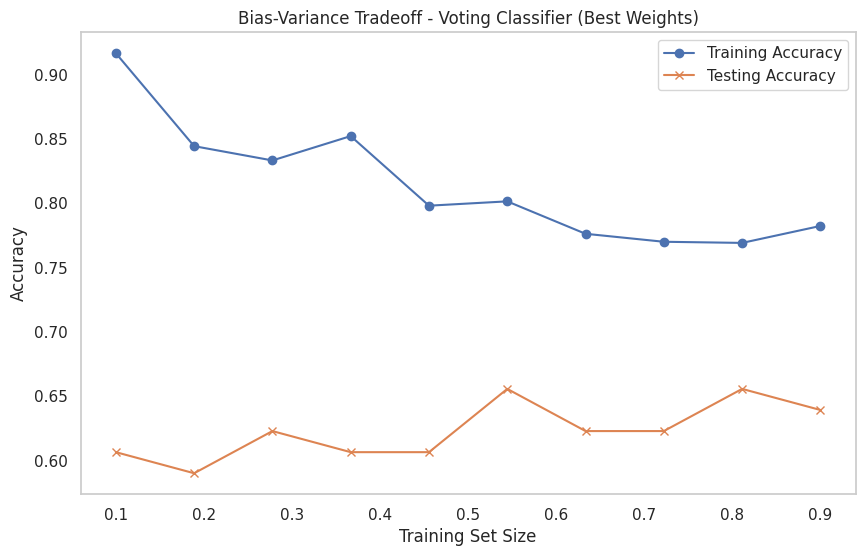

In [20]:
#F (Bias-Variance Tradeoff Graph)

trainSizes = np.linspace(0.1, 0.9, 10)
trainScores = []
testScores = []

for trainSize in trainSizes:
    X_train_part, _, Y_train_part, _ = train_test_split(X_train, Y_train, train_size=trainSize, random_state=42)

    bestVotingClas.fit(X_train_part, Y_train_part)

    trainAccuracy = accuracy_score(Y_train_part, bestVotingClas.predict(X_train_part))
    testAccuracy = accuracy_score(Y_test, bestVotingClas.predict(X_test))

    trainScores.append(trainAccuracy)
    testScores.append(testAccuracy)

# Plot the Bias-Variance Tradeoff graph
plt.figure(figsize=(10, 6))
plt.plot(trainSizes, trainScores, label='Training Accuracy', marker='o')
plt.plot(trainSizes, testScores, label='Testing Accuracy', marker='x')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff - Voting Classifier (Best Weights)')
plt.legend()
plt.grid()
plt.show()

In [21]:
#@title Task 03
#A AND B

X = dataset[['restecg', 'chol']]
Y = dataset['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train.shape)
print(X_test.shape)


(241, 2)
(61, 2)


In [24]:
#C

rfClassifier = RandomForestClassifier(random_state=42)
adaBClassifier = AdaBoostClassifier(random_state=42)

votingClassifier = VotingClassifier(
    estimators=[
        ('rf',rfClassifier),
        ('ada',adaBClassifier)
    ],voting = 'hard'
)

votingClassifier.fit(X_train,Y_train)
votingPred = votingClassifier.predict(X_test)
votAccuracy = accuracy_score(Y_test,votingPred)
print(f"Accuracy Of Soft Voting: {votAccuracy:.2f}")

rfClassifier.fit(X_train,Y_train)
rfTrainPred = rfClassifier.predict(X_train)
rfTestPred = rfClassifier.predict(X_test)
rfTrainAccuracy = accuracy_score(Y_train,rfTrainPred)
rfTestAccuracy = accuracy_score(Y_test,rfTestPred)
print(f"\nTraining Accuracy Of Random Forest: {rfTrainAccuracy:.2f}")
print(f"Testing Accuracy Of Random forest: {rfTestAccuracy:.2f}")

adaBClassifier.fit(X_train,Y_train)
adaTrainPred = adaBClassifier.predict(X_train)
adaTestPred = adaBClassifier.predict(X_test)
adaTrainAcc = accuracy_score(Y_train,adaTrainPred)
adaTestAcc = accuracy_score(Y_test,adaTestPred)
print(f"\nTraining Accuracy Of AdaBoost: {adaTrainAcc:.2f}")
print(f"Testing Accuracy Of AdaBoost: {adaTestAcc:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Of Soft Voting: 0.52

Training Accuracy Of Random Forest: 0.88
Testing Accuracy Of Random forest: 0.61

Training Accuracy Of AdaBoost: 0.71
Testing Accuracy Of AdaBoost: 0.52


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


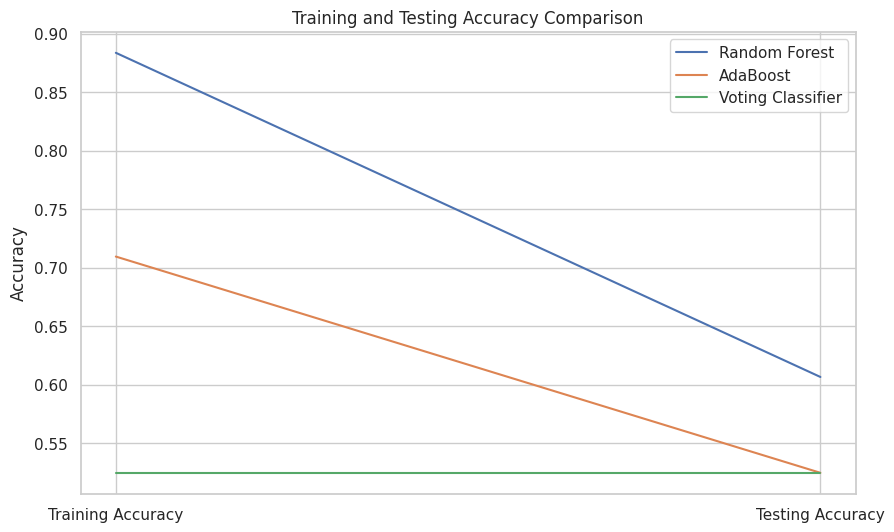

In [25]:
# Plotting Accuracies
plt.figure(figsize=(10, 6))
plt.plot([rfTrainAccuracy, rfTestAccuracy], label="Random Forest")
plt.plot([adaTrainAcc, adaTestAcc], label="AdaBoost")
plt.plot([votAccuracy, votAccuracy], label="Voting Classifier")
plt.xticks([0, 1], ["Training Accuracy", "Testing Accuracy"])
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()